In [2]:
import numpy as np 
import sympy as sp
import math
import random
import scipy.stats as sts 
from sympy import symbols, Eq, solve
from itertools import combinations
import scipy.special as sc
import matplotlib.pyplot as plt 
from scipy import integrate
from scipy import *
from statsmodels.sandbox.distributions.sppatch import expect_v2
from statsmodels.distributions.empirical_distribution import  ECDF
%matplotlib inline 

# Задание 1

### Задаем параметры и распределения для четырех велечин

In [3]:
m = 0
sigma = 1.5

N1 = 20
N2 = 50
N3 = 200
N4 = 1000

R1 = np.random.normal(m, sigma, N1)
R2 = np.random.normal(m,sigma, N2)
R3 = np.random.normal(m,sigma, N3)
R4 = np.random.normal(m,sigma, N4)

[ 0.51584148  1.26991261 -0.15590688  0.34212134 -0.8769529  -1.74092816
  3.00421926  1.09665251 -0.25450776  1.89808694 -0.21650898 -1.68410171
 -1.47368827 -0.71531404 -1.13872517 -1.23398992  0.17431334 -1.84970734
  0.57163277 -0.01653894]


### Распределение номер 1 с параметрами: m = 0, sigma = 1.5, n = 20

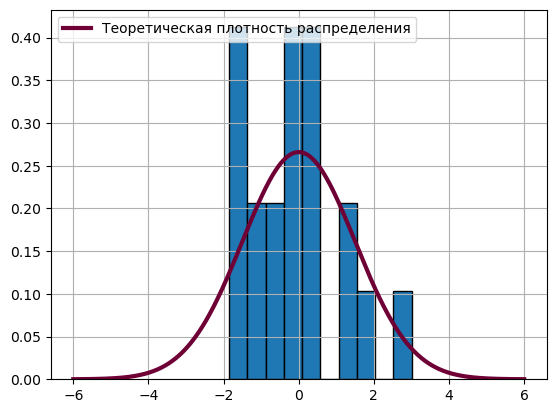

In [4]:
nk_zk1 = plt.hist(R1, bins = 10, edgecolor = 'black', density=True)

nk = np.array(nk_zk1[0])
zk = np.array(nk_zk1[1])

X = np.linspace(-6, 6, 1000)
f_X = sts.norm(m, sigma).pdf(X)
plt.plot(X, f_X, lw = 3, color ='#6f0035', label = 'Теоретическая плотность распределения')
plt.legend(loc = 'upper left')
plt.grid(True)

d = np.max(np.abs(nk - 0.25))

### Распределение номер 2 с параметрами: m = 0, sigma = 1.5, n = 50

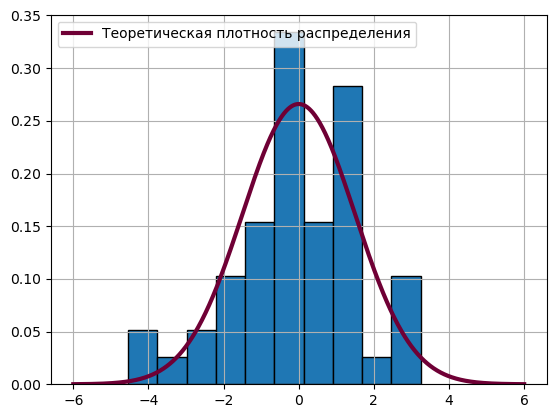

In [5]:
nk_zk1 = plt.hist(R2, bins = 10, edgecolor = 'black', density=True)

nk = np.array(nk_zk1[0])
zk = np.array(nk_zk1[1])

X = np.linspace(-6, 6, 1000)
f_X = sts.norm(m, sigma).pdf(X)
plt.plot(X, f_X, lw = 3, color ='#6f0035', label = 'Теоретическая плотность распределения')
plt.legend(loc = 'upper left')
plt.grid(True)

d = np.max(np.abs(nk - 0.25))

### Распределение номер 3 с параметрами: m = 0, sigma = 1.5, n = 200

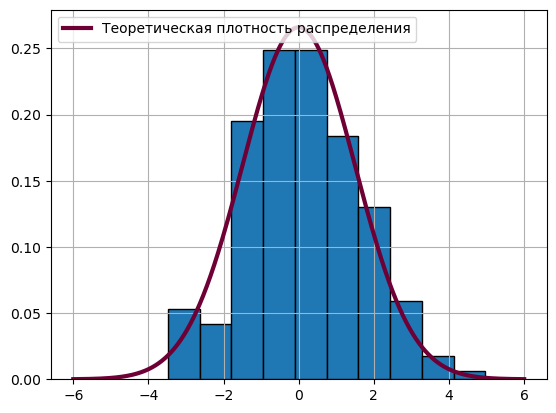

In [6]:
nk_zk1 = plt.hist(R3, bins = 10, edgecolor = 'black', density=True)

nk = np.array(nk_zk1[0])
zk = np.array(nk_zk1[1])

X = np.linspace(-6, 6, 1000)
f_X = sts.norm(m, sigma).pdf(X)
plt.plot(X, f_X, lw = 3, color ='#6f0035', label = 'Теоретическая плотность распределения')
plt.legend(loc = 'upper left')
plt.grid(True)

d = np.max(np.abs(nk - 0.25))

### Распределение номер 4 с параметрами: m = 0, sigma = 1.5, n = 1000

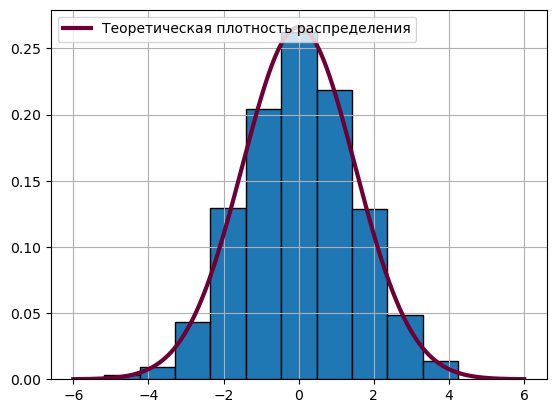

In [7]:
nk_zk1 = plt.hist(R4, bins = 10, edgecolor = 'black', density=True)
nk = np.array(nk_zk1[0])
zk = np.array(nk_zk1[1])

X = np.linspace(-6, 6, 1000)
f_X = sts.norm(m, sigma).pdf(X)
plt.plot(X, f_X, lw = 3, color ='#6f0035', label = 'Теоретическая плотность распределения')
plt.legend(loc = 'upper left')
plt.grid(True)

# Задание 2

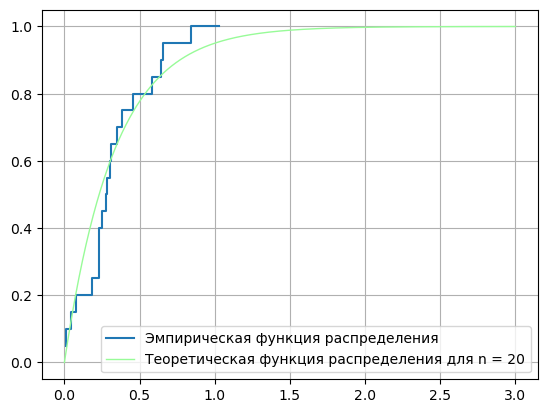

In [8]:
# Будет три выборки

N1 = 20
N2 = 200
N3 = 2000

Lambda = 3

Y1 = np.random.uniform(0,1, N1)
Y2 = np.random.uniform(0,1, N2)
Y3 = np.random.uniform(0,1, N3)


X1 = (-1/Lambda)*np.log(Y1)
ecdf = ECDF (X1)

# Теоретическая выборка
Xt = np.linspace(0,3,1000)
F_x = sts.expon(0, 1/Lambda).cdf(Xt)

plt.step(ecdf.x , ecdf.y , label = 'Эмпирическая функция распределения')
plt.plot(Xt , F_x , lw=1 , color = '#98FB98' , label = 'Теоретическая функция распределения для n = 20')


plt.legend()
plt.grid(True)

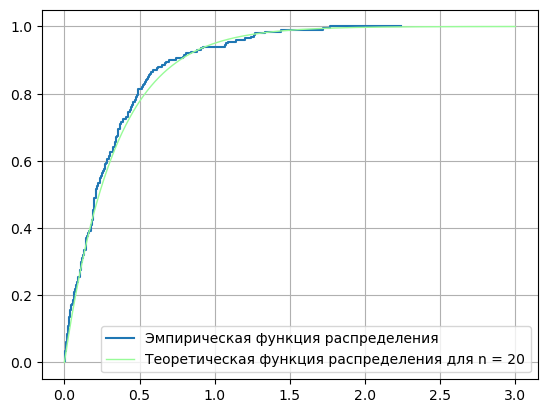

In [9]:
X2 = (-1/Lambda)*np.log(Y2)
ecdf = ECDF (X2)
plt.step(ecdf.x , ecdf.y , label = 'Эмпирическая функция распределения')
plt.plot(Xt , F_x , lw=1 , color = '#98FB98' , label = 'Теоретическая функция распределения для n = 20')


plt.legend()
plt.grid(True)

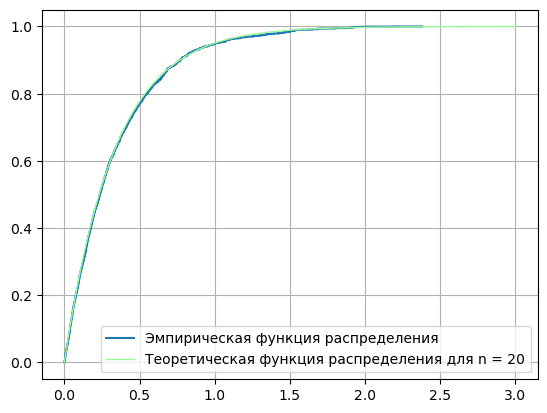

In [10]:
X3 = (-1/Lambda)*np.log(Y3)
ecdf = ECDF (X3)
plt.step(ecdf.x , ecdf.y , label = 'Эмпирическая функция распределения')
plt.plot(Xt , F_x , lw=1 , color = '#98FB98' , label = 'Теоретическая функция распределения для n = 20')


plt.legend()
plt.grid(True)

# Задание 3

## d - подсчитано по теореме о максимумах и минимумах функции. Для одних и тех же условий используем разные правила группировки интервалов и сравниваем их. Лучшим правилом оказалось: Райса. Отклонение в данном случае равно: 0.225... Можно определенно сказать, что рейтинг не устойчив т.к значения одного и того же метода отличаются в разы

Число интервалов группировки :  9
Максимальное отклонение гистограммы от плотности: d =  0.275671408831501


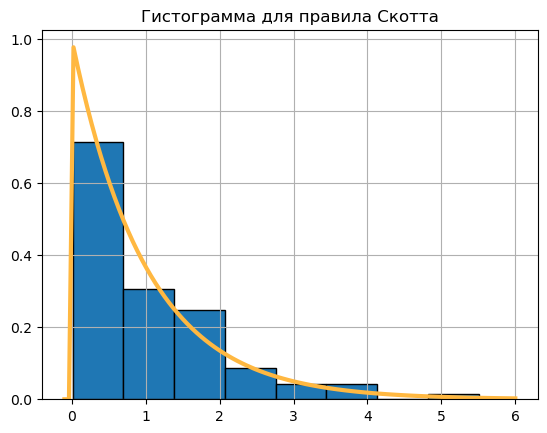

In [11]:
n1 = 100
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk_zk = plt.hist(x1_n , bins= 'scott' , edgecolor = 'black' , density= True)

nk = np.array(nk_zk[0])

plt.grid(True)
plt.title("Гистограмма для правила Скотта")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='scott')))

y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='scott') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))

Число интервалов группировки :  14
Максимальное отклонение гистограммы от плотности: d =  0.19574283481894872


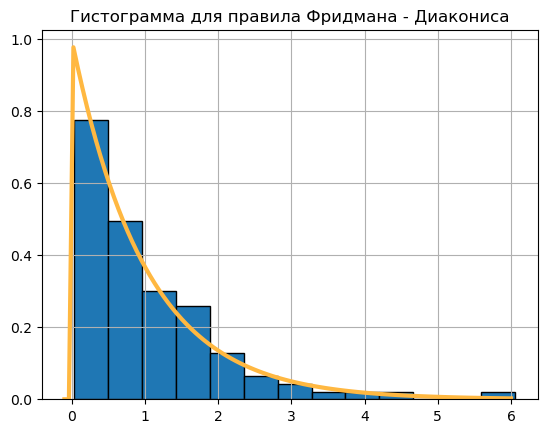

In [12]:
n1 = 100
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk = np.array(nk_zk[0])


nk_zk = plt.hist(x1_n , bins= 'fd' , edgecolor = 'black' , density= True)


plt.grid(True)
plt.title("Гистограмма для правила Фридмана - Диакониса")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='fd')))

y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='fd') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))

Число интервалов группировки :  9
Максимальное отклонение гистограммы от плотности: d =  0.3064651831090842


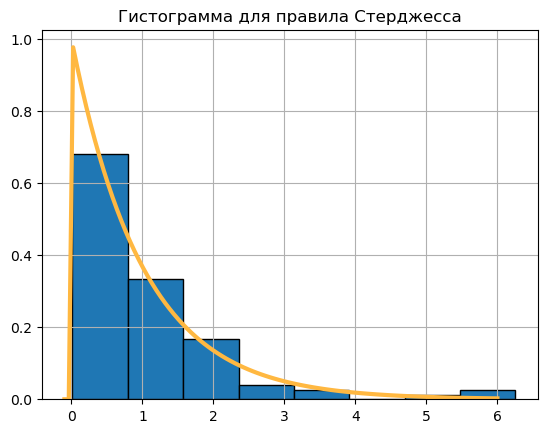

In [13]:
n1 = 100
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk = np.array(nk_zk[0])



nk_zk = plt.hist(x1_n , bins= 'sturges' , edgecolor = 'black' , density= True)


plt.grid(True)
plt.title("Гистограмма для правила Стерджесса")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='sturges')))


y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='sturges') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))






Число интервалов группировки :  11
Максимальное отклонение гистограммы от плотности: d =  0.30043830965317464


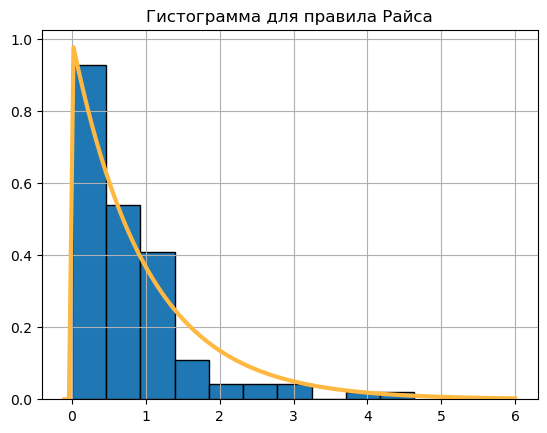

In [14]:
n1 = 100
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk = np.array(nk_zk[0])

nk_zk = plt.hist(x1_n , bins= 'rice' , edgecolor = 'black' , density= True)


plt.grid(True)
plt.title("Гистограмма для правила Райса")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='rice')))

y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='rice') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))

Число интервалов группировки :  11
Максимальное отклонение гистограммы от плотности: d =  0.2512989636073959


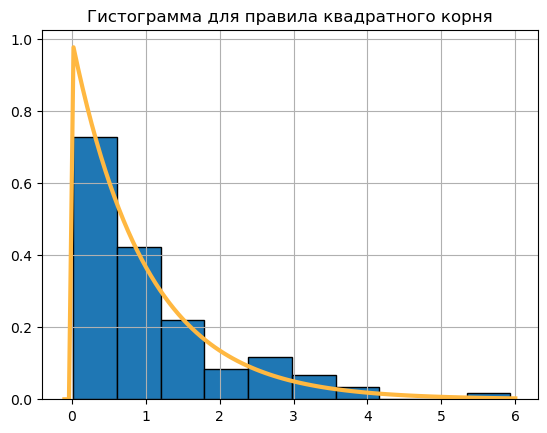

In [15]:
n1 = 100
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk = np.array(nk_zk[0])


nk_zk = plt.hist(x1_n , bins= 'sqrt' , edgecolor = 'black' , density= True)


plt.grid(True)
plt.title("Гистограмма для правила квадратного корня")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='sqrt')))

y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='sqrt') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))

Число интервалов группировки :  40
Максимальное отклонение гистограммы от плотности: d =  0.16099537413979847


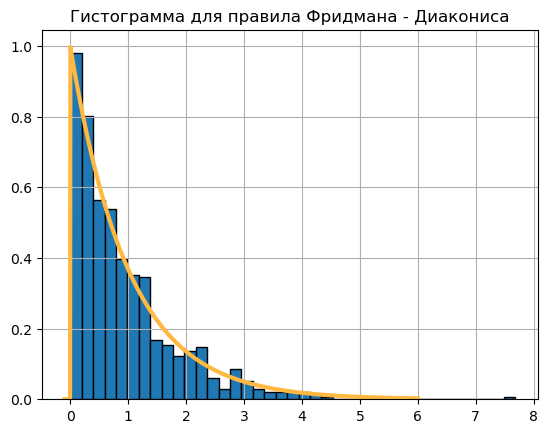

In [16]:
n1 = 1000
lambd = 1

x1_n = np.random.exponential(scale= lambd, size = n1)
xx = np.linspace(-0.1,6,n1)
f_x = sts.expon(0,1/lambd).pdf(xx)

plt.plot(xx , f_x , lw=3 , color = '#FFB841' )

nk = np.array(nk_zk[0])


nk_zk = plt.hist(x1_n , bins= 'fd' , edgecolor = 'black' , density= True)


plt.grid(True)
plt.title("Гистограмма для правила Фридмана - Диакониса")

print('Число интервалов группировки : ',len(np.histogram_bin_edges(x1_n , bins='fd')))

y = sts.expon(0,1/lambd).pdf(np.histogram_bin_edges(x1_n , bins='fd') )

result = []
for i in range(np.size(nk_zk[0])):
    x = max(abs(nk_zk[0][i] - y[i]) ,abs( nk_zk[0][i] - y[i+1]))
    result.append(x)

    
print ('Максимальное отклонение гистограммы от плотности: d = ' , np.max(result))

In [17]:
### Вывод:Рейтинг НЕ устойчив, т.к значения колеблются очень сильно, в 2 раза например и больше 